In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
%matplotlib inline


In [55]:
dataset = pd.read_csv("processed.cleveland.data", header=None)
dataset.columns = [
    "age",
    "sex",
    "cp",
    "restbp",
    "chol",
    "fbs",
    "restecg",
    "thalach",
    "exang", 
    "oldpeak",
    "slope",
    "ca",
    "thal",
    "hd",
]
dataset.head()


,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [56]:
dataset.dtypes


age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [57]:
dataset['ca'].unique()
dataset['thal'].unique()


array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [58]:
df = dataset.loc[(dataset["ca"] != "?") & (dataset["thal"] != "?")]

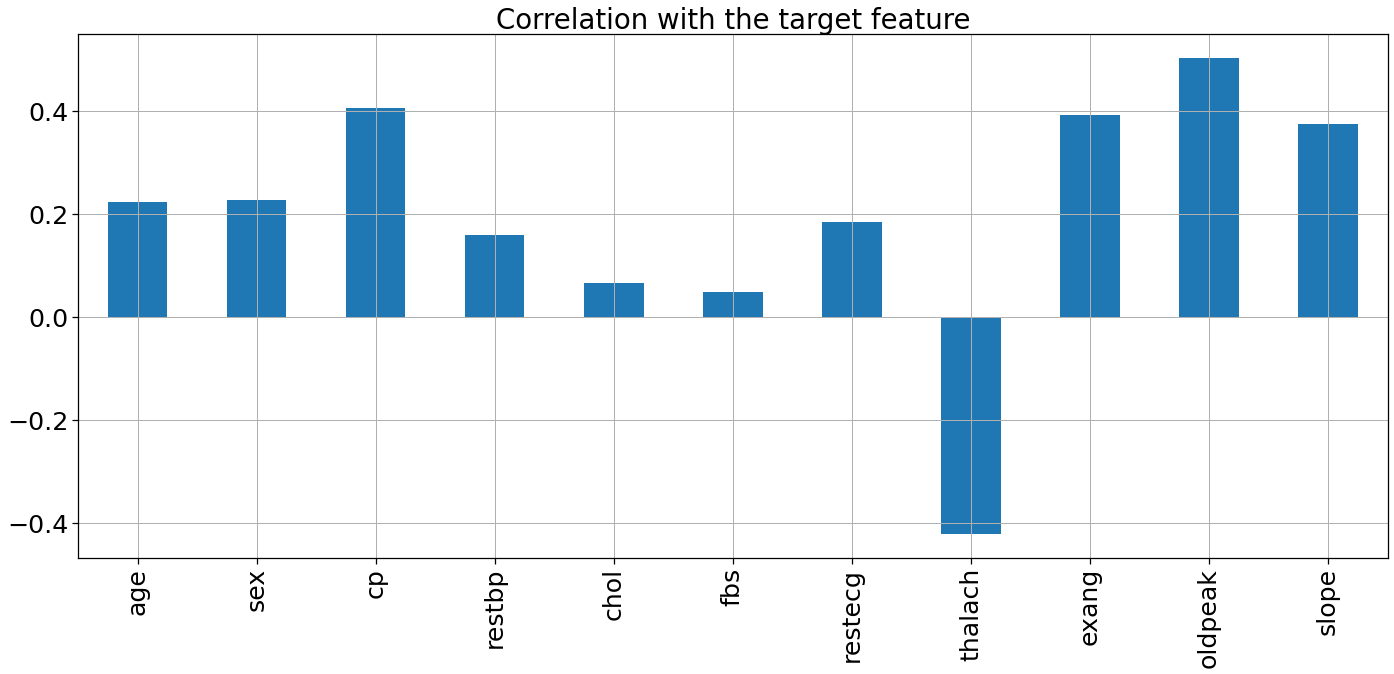

In [59]:
sns.set_context("notebook", font_scale=2.3)
df.drop("hd", axis=1).corrwith(df.hd).plot(
    kind="bar", grid=True, figsize=(20, 10), title="Correlation with the target feature"
)
plt.tight_layout()


In [60]:
X = df.iloc[:, :-1]
X.head()


,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [61]:
y = df.iloc[:, [-1]]
y.head()


,hd
0,0
1,2
2,1
3,0
4,0


In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [63]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# ensembling
from mlxtend.classifier import StackingCVClassifier


In [65]:
shallow_tree = DecisionTreeClassifier(max_depth=1, random_state=100)
ab = AdaBoostClassifier(base_estimator=shallow_tree, n_estimators=24)

ab.fit(X_train, y_train.values.ravel())
y_pred = ab.predict(X_test)

ab_predicted = ab.predict(X_test)
ab_conf_matrix = confusion_matrix(y_test, ab_predicted)
ab_acc_score = accuracy_score(y_test, ab_predicted)
print("confussion matrix")
print(ab_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:", ab_acc_score * 100, "\n")
print(classification_report(y_test, ab_predicted))

confussion matrix
[[27  1  0  1  1]
 [ 7  0  0  3  2]
 [ 1  3  0  3  0]
 [ 0  2  0  3  1]
 [ 1  3  0  1  0]]


Accuracy of StackingCVClassifier: 50.0 

              precision    recall  f1-score   support

           0       0.75      0.90      0.82        30
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00         7
           3       0.27      0.50      0.35         6
           4       0.00      0.00      0.00         5

    accuracy                           0.50        60
   macro avg       0.20      0.28      0.23        60
weighted avg       0.40      0.50      0.44        60



c:\Users\ishaa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ishaa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ishaa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [66]:
xgb = XGBClassifier(
    learning_rate=0.05,
    n_estimators=24,
    max_depth=10,
    gamma=0.2,
    subsample=0.52,
    colsample_bytree=0.54,
    seed=27,
    reg_lambda=2,
    colsample_bylevel=0.5,
    colsample_bynode=0.5,
)

xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:", xgb_acc_score * 100, "\n")
print(classification_report(y_test, xgb_predicted))


confussion matrix
[[30  0  0  0  0]
 [ 9  1  0  2  0]
 [ 4  1  0  2  0]
 [ 3  0  0  3  0]
 [ 3  0  2  0  0]]


Accuracy of Extreme Gradient Boost: 56.666666666666664 

              precision    recall  f1-score   support

           0       0.61      1.00      0.76        30
           1       0.50      0.08      0.14        12
           2       0.00      0.00      0.00         7
           3       0.43      0.50      0.46         6
           4       0.00      0.00      0.00         5

    accuracy                           0.57        60
   macro avg       0.31      0.32      0.27        60
weighted avg       0.45      0.57      0.45        60



c:\Users\ishaa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ishaa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ishaa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [67]:
bc = BaggingClassifier(
    base_estimator=KNeighborsClassifier(),
    n_estimators=21,
    max_samples=0.5,
    max_features=0.6,
)

bc.fit(X_train, y_train.values.ravel())
bc_predicted = bc.predict(X_test)
bc_conf_matrix = confusion_matrix(y_test, bc_predicted)
bc_acc_score = accuracy_score(y_test, bc_predicted)
print("confussion matrix")
print(bc_conf_matrix)
print("\n")
print("Accuracy of Random Forest:", bc_acc_score * 100, "\n")
print(classification_report(y_test, bc_predicted))


confussion matrix
[[29  1  0  0  0]
 [10  1  0  1  0]
 [ 3  1  3  0  0]
 [ 2  2  2  0  0]
 [ 2  0  1  2  0]]


Accuracy of Random Forest: 55.00000000000001 



c:\Users\ishaa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.63      0.97      0.76        30
           1       0.20      0.08      0.12        12
           2       0.50      0.43      0.46         7
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         5

    accuracy                           0.55        60
   macro avg       0.27      0.30      0.27        60
weighted avg       0.41      0.55      0.46        60



c:\Users\ishaa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ishaa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
rf = RandomForestClassifier(n_estimators=25, random_state=2, max_depth=5)
rf.fit(X_train, y_train.values.ravel())
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:", rf_acc_score * 100, "\n")
print(classification_report(y_test, rf_predicted))


confussion matrix
[[29  1  0  0  0]
 [ 9  0  2  1  0]
 [ 4  0  1  2  0]
 [ 2  1  0  3  0]
 [ 2  0  1  2  0]]


Accuracy of Random Forest: 55.00000000000001 

              precision    recall  f1-score   support

           0       0.63      0.97      0.76        30
           1       0.00      0.00      0.00        12
           2       0.25      0.14      0.18         7
           3       0.38      0.50      0.43         6
           4       0.00      0.00      0.00         5

    accuracy                           0.55        60
   macro avg       0.25      0.32      0.27        60
weighted avg       0.38      0.55      0.45        60



c:\Users\ishaa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ishaa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ishaa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [69]:
svc = SVC(kernel="rbf", C=2)
svc.fit(X_train, y_train.values.ravel())
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:", svc_acc_score * 100, "\n")
print(classification_report(y_test, svc_predicted))


confussion matrix
[[27  3  0  0  0]
 [ 8  3  1  0  0]
 [ 2  1  2  2  0]
 [ 2  2  2  0  0]
 [ 2  1  1  1  0]]


Accuracy of Support Vector Classifier: 53.333333333333336 

              precision    recall  f1-score   support

           0       0.66      0.90      0.76        30
           1       0.30      0.25      0.27        12
           2       0.33      0.29      0.31         7
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         5

    accuracy                           0.53        60
   macro avg       0.26      0.29      0.27        60
weighted avg       0.43      0.53      0.47        60



c:\Users\ishaa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ishaa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ishaa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [70]:
scv = StackingCVClassifier(
    classifiers=[xgb, ab, svc], meta_classifier=rf, random_state=42
)
scv.fit(X_train, y_train.values.ravel())

scv_predicted = scv.predict(X_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:", scv_acc_score * 100, "\n")
print(classification_report(y_test, scv_predicted))


confussion matrix
[[29  0  0  1  0]
 [ 8  0  2  2  0]
 [ 2  1  1  3  0]
 [ 3  0  1  2  0]
 [ 2  1  0  2  0]]


Accuracy of StackingCVClassifier: 53.333333333333336 

              precision    recall  f1-score   support

           0       0.66      0.97      0.78        30
           1       0.00      0.00      0.00        12
           2       0.25      0.14      0.18         7
           3       0.20      0.33      0.25         6
           4       0.00      0.00      0.00         5

    accuracy                           0.53        60
   macro avg       0.22      0.29      0.24        60
weighted avg       0.38      0.53      0.44        60



c:\Users\ishaa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ishaa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ishaa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,